# Laboratory Exercise 1 (Linear Regression)
## Pollux M. Rey

**Step 1: Import necessary libraries**

For this laboratory exercise, the required libraries include *Pandas*, *Seaborn*, and classes from *scikit-learn*.
* Pandas provides data manipulation and analysis tools, including a DataFrame object, making it convenient for working with structured data such as CSV files.
* Seaborn is a data visualization library built on top of Matplotlib, providing a high-level interface for creating attractive and informative statistical graphics.
* scikit-learn is a machine learning library that provides a wide range of tools and algorithms for data preprocessing, model selection, training, evaluation, and deployment.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression

**Step 2: Data Preprocessing**

In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Salary_Data.csv')

# Print the DataFrame
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


The data contains infomation about individuals' years of experience and their corresponding salaries. In each row, the `YearsExperience` column represents the number of years an individual has worked, while the `Salary` column represents the associated salary amount.

In [3]:
# Print the information of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


In [4]:
# Print the statistical summary of the DataFrame
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


The `df.describe()` function is used to generate descriptive statistics of a DataFrame.

For each numerical column in the DataFrame, `df.describe()` provides various statistics, including:
* Count: The number of non-empty values in the column.
* Mean: The average value of the column.
* Standard deviation: A measure of the dispersion or spread of the column values.
* Minimum: The smallest value in the column.
* 25th percentile: The value below which 25% of the data falls.
* 50th percentile (median): The value below which 50% of the data falls.
* 75th percentile: The value below which 75% of the data falls.
* Maximum: The largest value in the column.

Meanwhile, the data appears to be free of inconsistencies, errors, or missing values.

**Step 2: Exploratory Data Analysis**

[Text(0.5, 1.0, 'Years of Experience vs Salary'),
 Text(0.5, 0, 'Years of Experience'),
 Text(0, 0.5, 'Salary')]

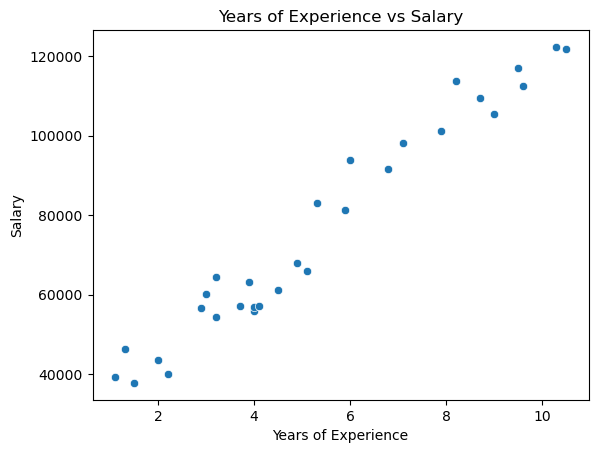

In [5]:
# Create the scatterplot
scatterplot = sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])

# Set the title, x-label, and y-label
scatterplot.set(title='Years of Experience vs Salary', xlabel='Years of Experience', ylabel='Salary')

[Text(0.5, 1.0, 'Salary vs Years of Experience'),
 Text(0.5, 0, 'Salary'),
 Text(0, 0.5, 'Years of Experience')]

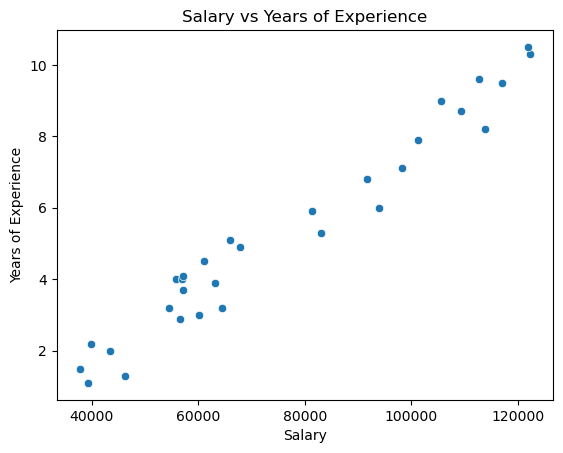

In [6]:
# Create the scatterplot
scatterplot = sns.scatterplot(x=df['Salary'], y=df['YearsExperience'])

# Set the title, x-label, and y-label
scatterplot.set(title='Salary vs Years of Experience', xlabel='Salary', ylabel='Years of Experience')

The scatter plots indicate a positive correlation between years of experience and salary. These plots suggest that individuals with more years of experience tend to have higher salaries, while those with fewer years of experience tend to have lower salaries.

                     Years of Experience    Salary
Years of Experience             1.000000  0.978242
Salary                          0.978242  1.000000


<Axes: >

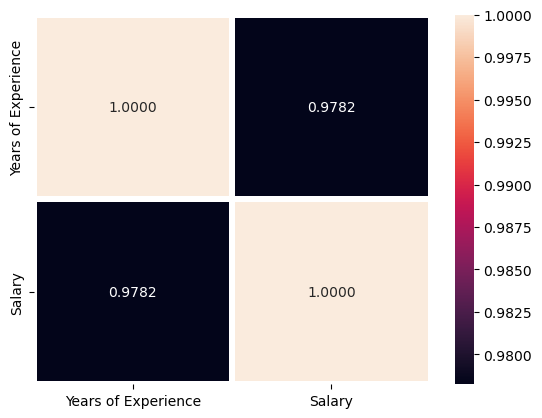

In [7]:
# Create a correlation matrix
corr_matrix = df.corr()

# Rename the label
new_label = {
    'YearsExperience': 'Years of Experience'
}
corr_matrix = corr_matrix.rename(columns=new_label, index=new_label)

# Print the correlation matrix
print(corr_matrix)

# Create the correlation heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=3, fmt='.4f')

Based on the heatmap, there is a **strong positive correlation coefficient** of 0.9782 between years of experience and salary, indicating a **strong linear relationship** between the two variables.

**Step 3: Data Modeling and Evaluation**

In [8]:
# Years of Experience vs Salary

# Split data into feature 'Years of Experience' and target variable 'Salary'
X = df[['YearsExperience']]
y = df['Salary']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Print training and test sets
print('Training sets:\n')
print(f'X:\n{X_train}\n\n')
print(f'y:\n{y_train}\n\n')
print('Test sets:\n')
print(f'X:\n{X_test}\n\n')
print(f'y:\n{y_test}\n')

# Create a Linear Regression model
model = LinearRegression()

# Define the number of folds for cross-validation
num_folds = 10

# Create a cross-validation iterator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=100)

# Perform cross-validation on training data
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the scores, mean, and standard deviation
print(f'Cross-validation scores: {scores}')
print(f'Mean: {mean_score}')
print(f'Standard deviation: {std_score}\n')

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
predictions = model.predict(X_test)
test_score = model.score(X_test, y_test)
print(f'Predicted salaries: {predictions}')
print(f'Test score: {test_score}\n')

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficient:", coefficients[0])
print("Intercept:", intercept)

Training sets:

X:
    YearsExperience
27              9.6
25              9.0
6               3.0
17              5.3
22              7.9
11              4.0
4               2.2
29             10.5
0               1.1
1               1.3
18              5.9
14              4.5
19              6.0
21              7.1
2               1.5
20              6.8
10              3.9
16              5.1
15              4.9
23              8.2
7               3.2
3               2.0
24              8.7
8               3.2


y:
27    112635.0
25    105582.0
6      60150.0
17     83088.0
22    101302.0
11     55794.0
4      39891.0
29    121872.0
0      39343.0
1      46205.0
18     81363.0
14     61111.0
19     93940.0
21     98273.0
2      37731.0
20     91738.0
10     63218.0
16     66029.0
15     67938.0
23    113812.0
7      54445.0
3      43525.0
24    109431.0
8      64445.0
Name: Salary, dtype: float64


Test sets:

X:
    YearsExperience
9               3.7
26              9.5
28        

A 10-fold cross-validation was performed, evaluating each iteration using the R^2 score.The R^2 score is a statistical measure used to evaluate the performance of a regression model.  It ranges from 0 to 1, with 0 indicating a model that does not explain any of the data's patterns and 1 indicating a model that perfectly predicts the data.

The cross-validation yielded R^2 scores ranging from 0.9967 to 0.6908, with one outlier value of -4.9344. In the context of scikit-learn, a negative R^2 score can occur if the model performs worse than a baseline model. This can happen due to various reasons, such as poor fit to the data and inadequate features.

The overall training data achieved an R^2 score of 0.9721. This indicates that the model can explain about 97.21% of the patterns or differences in the data. Hence, the model effectively predicts and understands the relationship between years of experience and salary.

Test set of years of experience and predicted salaries:

   YearsExperience         Salary
0              3.7   61455.195763
1              9.5  115749.670827
2             10.3  123238.563939
3              4.1   65199.642319
4              2.9   53966.302651
5              4.0   64263.530680


Test set of years of experience and actual salaries:

   YearsExperience    Salary
0              3.7   57189.0
1              9.5  116969.0
2             10.3  122391.0
3              4.1   57081.0
4              2.9   56642.0
5              4.0   56957.0




<Axes: title={'center': 'Years of Experience vs Salary'}, xlabel='Years of Experience', ylabel='Salary'>

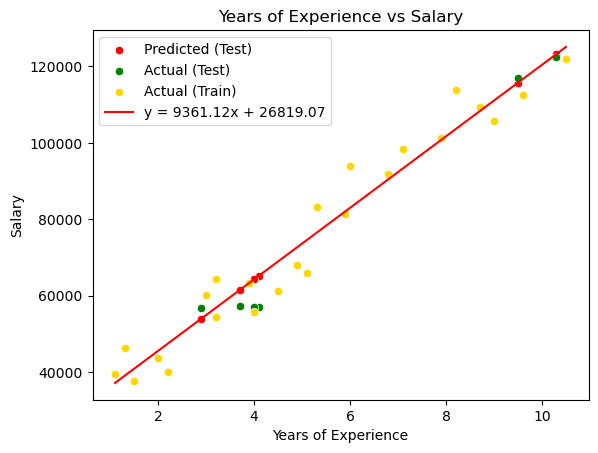

In [9]:
# Combine X_test and predictions
X_test_predictions_df = pd.DataFrame({'YearsExperience': X_test['YearsExperience'], 'Salary': predictions}).reset_index(drop=True)
print(f'Test set of years of experience and predicted salaries:\n\n{X_test_predictions_df}\n\n')

# Combine X_test and actual data
X_test_actual_df = pd.DataFrame({'YearsExperience': X_test['YearsExperience'], 'Salary': y_test}).reset_index(drop=True)
print(f'Test set of years of experience and actual salaries:\n\n{X_test_actual_df}\n\n')

# Combine X_train and y_train
X_train_y_train_df = pd.DataFrame({'YearsExperience': X_train['YearsExperience'], 'Salary': y_train}).reset_index(drop=True)

# Create a separate DataFrame for the line
line_df = pd.DataFrame({'YearsExperience': X['YearsExperience']})
line_df['Salary'] = coefficients[0] * line_df['YearsExperience'] + intercept

# Create the scatterplot
scatterplot = sns.scatterplot(data=X_test_predictions_df, x='YearsExperience', y='Salary', color='red', label='Predicted (Test)')

# Set the title, x-label, and y-label
scatterplot.set(title='Years of Experience vs Salary', xlabel='Years of Experience', ylabel='Salary')

# Add actual data to the scatterplot
sns.scatterplot(data=X_test_actual_df, x='YearsExperience', y='Salary', color='green', label='Actual (Test)')

# Add actual data to the scatterplot
sns.scatterplot(data=X_train_y_train_df, x='YearsExperience', y='Salary', color='gold', label='Actual (Train)')

# Plot the line
equation = f"y = {round(coefficients[0], 2)}x + {round(intercept, 2)}"
sns.lineplot(data=line_df, x='YearsExperience', y='Salary', color='red', label=equation)

The scatter plot shows the linear relationship between the years of experience and the salary, as predicted by the model. The actual and predicted data points are plotted on the graph, and the coefficient and intercept of the linear equation are also shown. The coefficient is 9361.12, and the intercept is 26819.07.

**Conclusion**

In conclusion, the analysis conducted revealed a strong positive correlation of 0.9782 between years of experience and salary, indicating that individuals with more years of experience tend to have higher salaries. The model built using the data achieved an R^2 score of 0.9721, suggesting that it can effectively predict and understand the relationship between years of experience and salary. The scatter plot and linear equation show a clear linear relationship, with a coefficient of 9361.12 and an intercept of 26819.07.